In [5]:
# %pip install pandas
# %pip install SQLAlchemy
# %pip install pymysql
# %pip install pm4py

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import os
import pm4py
from event_log_generator import db_utils

In [9]:
# read .env
from dotenv import load_dotenv
load_dotenv()


mysql_user = os.environ.get('JUPYTER_MYSQL_USER')
mysql_password = os.environ.get('JUPYTER_MYSQL_PASSWORD')
mysql_host = os.environ.get('JUPYTER_MYSQL_HOST')
mysql_db = os.environ.get('JUPYTER_MYSQL_DB')
mysql_port = os.environ.get('JUPYTER_MYSQL_PORT')

# create connection string
db_connection = db_utils.get_db_connection(
    mysql_host, mysql_port, mysql_user, mysql_password, mysql_db)
resource_ids = [os.environ.get('JUPYTER_RESOURCE_ID')]
event_log = db_utils.read_events_into_df(
    db_connection, None, None, resource_ids, None)
# remove SERVICE_CUSTOM_MESSAGE_2 events
event_log = event_log[event_log["EVENT_TYPE"] != "SERVICE_CUSTOM_MESSAGE_2"]
# remove lifecycle:transition = start events
event_log = event_log[event_log["lifecycle:transition"] != "start"]
event_log.head()

Reading events from database from None until None


,EVENT_TYPE,case:concept:name,concept:name,time:timestamp,lifecycle:transition,RESOURCE,RESOURCE_TYPE,REMARKS
1,SERVICE_CUSTOM_MESSAGE_1,7e4d89cd-fc04-40ec-aadf-f6664b21c210,welcome,2023-10-18 14:31:44,complete,0e01d6a089fb995228d599eccf39dcaec67712b6cd55e7...,bot,"{""user"": ""2025f9df384a4e9fe67c5e82cd18261444a2..."
3,SERVICE_CUSTOM_MESSAGE_1,8f3b0c75-cc9a-4dbe-9ba2-16404798968b,welcome,2023-10-18 14:44:07,complete,0e01d6a089fb995228d599eccf39dcaec67712b6cd55e7...,bot,"{""user"": ""e63935c69ec1338a0242709630eac41ab214..."
5,SERVICE_CUSTOM_MESSAGE_1,9d8a1f51-1bf6-4f31-822b-09f27a398164,welcome,2023-10-18 14:44:45,complete,0e01d6a089fb995228d599eccf39dcaec67712b6cd55e7...,bot,"{""user"": ""e63935c69ec1338a0242709630eac41ab214..."
7,SERVICE_CUSTOM_MESSAGE_1,7912dc17-8967-4e8e-8dd8-65b65d0da0cf,welcome,2023-10-18 14:52:23,complete,0e01d6a089fb995228d599eccf39dcaec67712b6cd55e7...,bot,"{""user"": ""f6e938625a11acbdab962c07128e055d866a..."
9,SERVICE_CUSTOM_MESSAGE_1,83520c1b-fe15-49c6-9f2f-804f4c1f9d9a,welcome,2023-10-18 14:54:59,complete,0e01d6a089fb995228d599eccf39dcaec67712b6cd55e7...,bot,"{""user"": ""2025f9df384a4e9fe67c5e82cd18261444a2..."


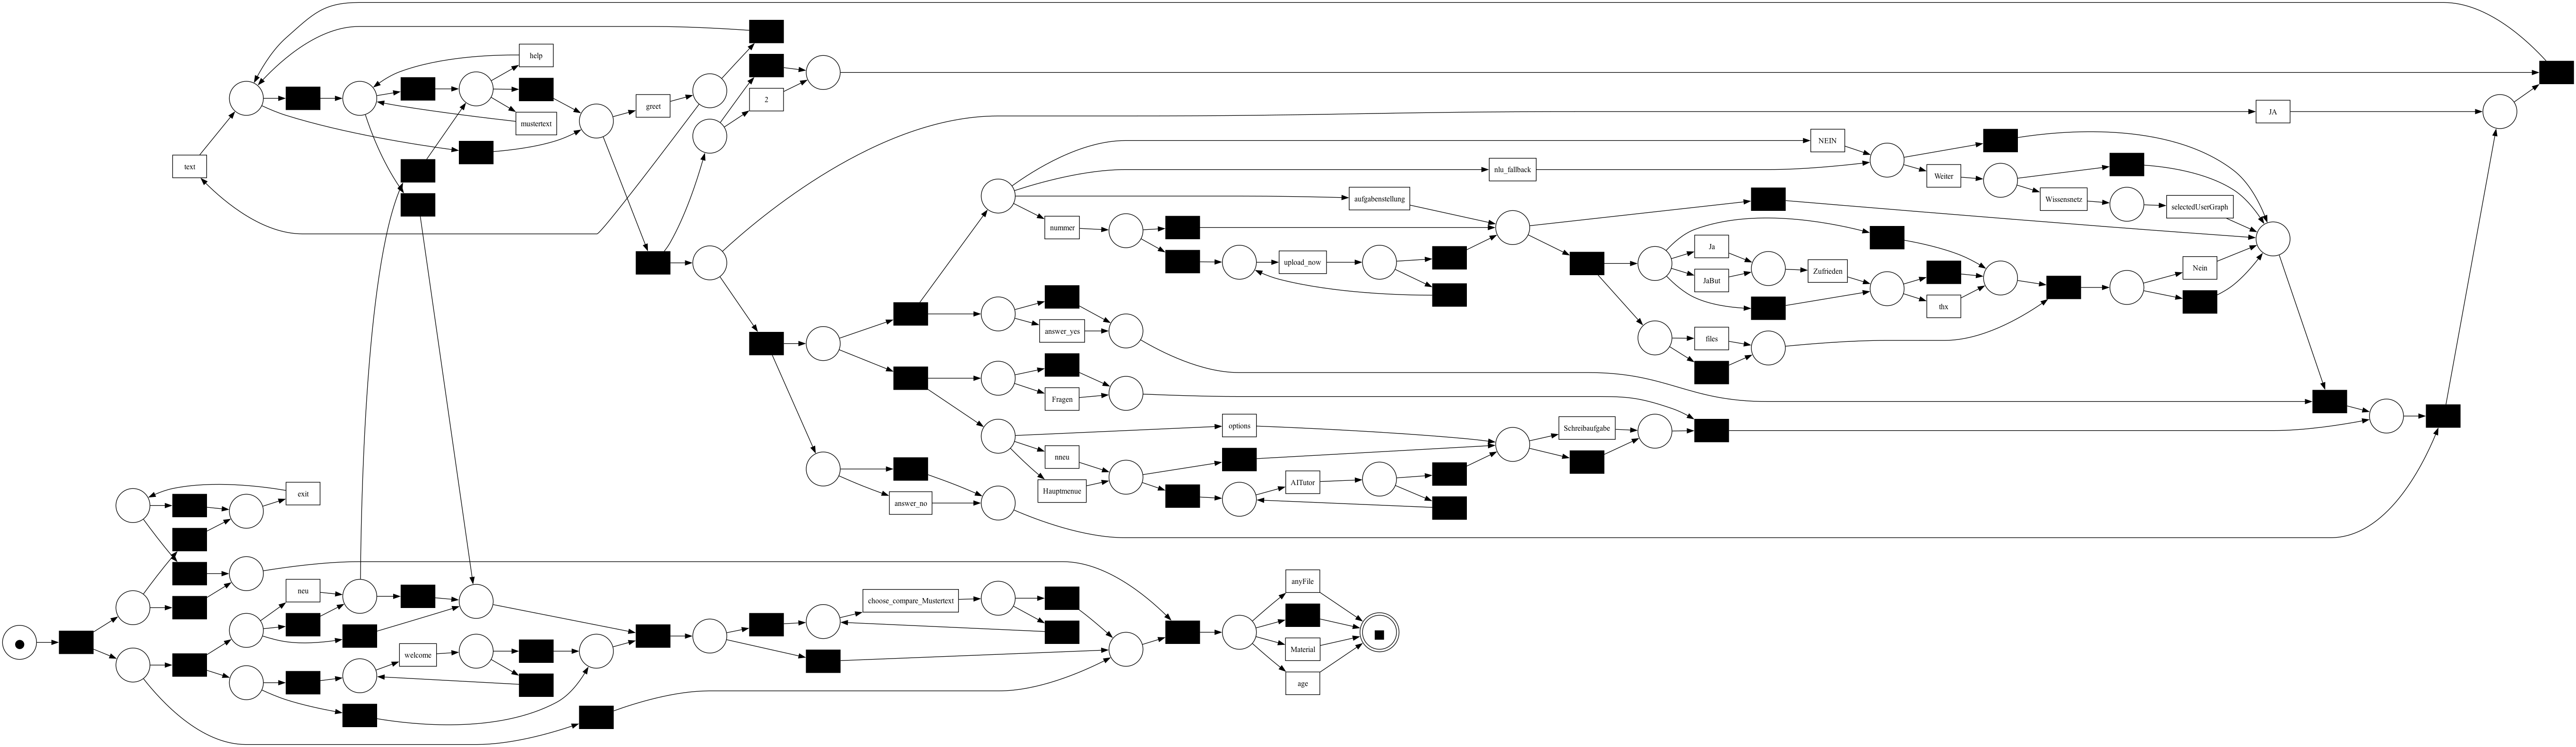

In [10]:
net , im , fm =pm4py.discover_petri_net_inductive(event_log)
net = pm4py.reduce_petri_net_invisibles(net)
net,im,fm = pm4py.reduce_petri_net_implicit_places(net, im, fm)
pm4py.view_petri_net(net,im, fm)